In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.Markovian_fBiPotDDims_NonSep.recursive_Markovian_PostMeanScore_fBiPot8DimsNewNS_T256_H05_tl_110data_StbleTgt  import get_config

In [2]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [3]:
def rmse_ignore_nans(y_true, y_pred):
    return np.nanmean((y_true-y_pred)**2)

def plot_ewma_losses(epochs, losses):
    start_idx = 00
    def compute_ema(loss_tensor, beta):
        ema_values = np.zeros_like(loss_tensor)  # Initialize EMA tensor
        ema_values[0] = loss_tensor[0]  # First value stays the same

        for i in range(1, len(loss_tensor)):
            ema_values[i] = beta * ema_values[i - 1] + (1 - beta) * loss_tensor[i]

        return ema_values
    # Define EMA decay rates
    beta_short = 0.9   # Short-term trend (reacts quickly)
    beta_long = 0.99   # Long-term trend (smoother)

    # Compute EMAs
    short_term_ema = compute_ema(losses, beta_short)
    long_term_ema = compute_ema(losses, beta_long)
    plt.scatter(epochs[start_idx:], (short_term_ema[start_idx:]),s=2, label="Short Term Loss")
    plt.yscale("log")
    plt.legend()
    plt.show()
    plt.scatter(epochs[start_idx:], (long_term_ema[start_idx:]),s=2, label="Long Term Loss")
    plt.yscale("log")
    plt.legend()
    plt.show()


In [4]:
config = get_config()
deltaT = config.deltaT
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
print(config.loss_factor)

2


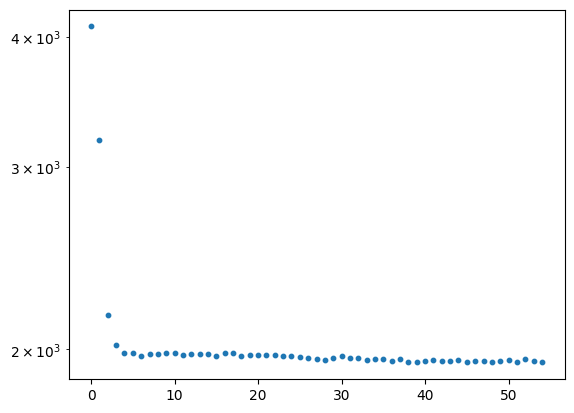

54

In [5]:
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        losses = (np.array(pickle.load(f)).astype(float))
Nepochs_losses = np.arange(losses.shape[0])
plt.scatter(Nepochs_losses,  losses, s=10)
plt.yscale("log")
plt.show()
plt.close()
Nepochs_losses[-1]

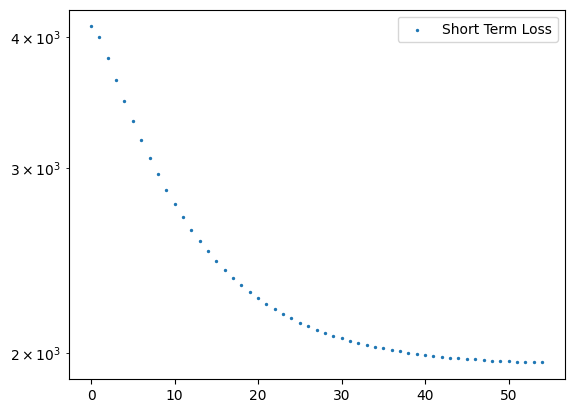

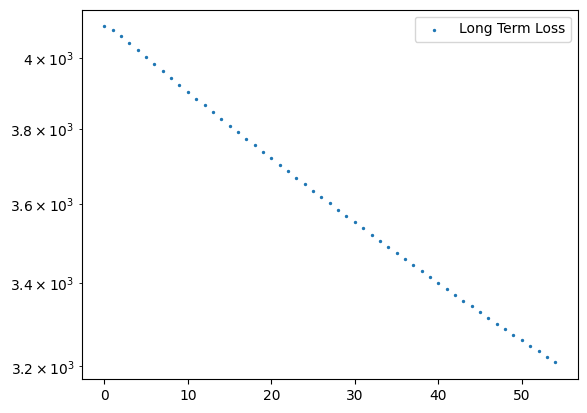

In [6]:
plot_ewma_losses(epochs=Nepochs_losses, losses=losses)

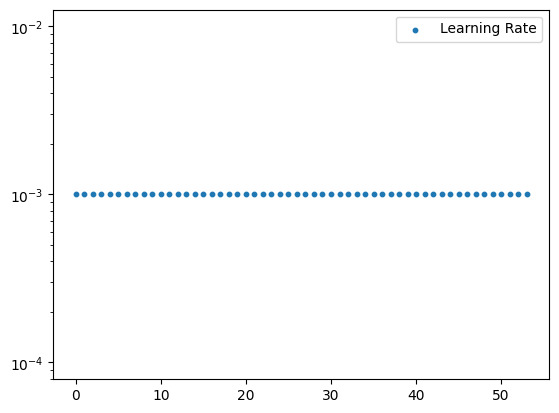

0.001


In [7]:
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss_LR", 'rb') as f:
        LRs = (np.array(pickle.load(f)).astype(float))
start = 0#935
end = -1#935+152
plt.scatter(Nepochs_losses[start:end],  LRs[start:end], s=10, label="Learning Rate")
plt.yscale("log")
plt.legend()
plt.show()
plt.close()
print(LRs[-1])

In [8]:
def get_drift_files(config, ts_type):
    root_score_dir = root_dir + f"ExperimentResults/TSPM_Markovian/8DDimsNS/New/"
    driftoostrack_true_files = []
    driftoostrack_local_files = []
    for file in os.listdir(root_score_dir):
        if "_MLP_" in file and ts_type in file:
            if "DriftTrack" in file and "true" in file:
                driftoostrack_true_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "global" in file:
                driftoostrack_local_files.append(root_score_dir+file)
    assert len(driftoostrack_true_files)>0, "No oos drift track files found"
    assert len(driftoostrack_local_files)>0, "No oos drift track files found"
    assert(len(driftoostrack_true_files) == len(driftoostrack_true_files))
    def extract_bw_drift_track_number(s):
        match = s.split("Nep_")[0].split("_")[-1]
        return int(match)
    driftoostrack_true_files = sorted(driftoostrack_true_files, key=extract_bw_drift_track_number)
    driftoostrack_local_files = sorted(driftoostrack_local_files, key=extract_bw_drift_track_number)
    Nepochs_track = [extract_bw_drift_track_number(f) for f in driftoostrack_true_files]
    return driftoostrack_true_files, driftoostrack_local_files, Nepochs_track

In [9]:
ts_type = f"ST_{config.feat_thresh:.3f}FTh_New_fBiPot_{config.ndims}DDimsNS".replace(".", "")
drift_true_files, drift_local_files, Nepochs_track = get_drift_files(config=config, ts_type=ts_type)
len(Nepochs_track)
print(drift_true_files)

['/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/8DDimsNS/New/TSPM_MLP_ST_0010FTh_New_fBiPot_8DDimsNS_OOSDriftTrack_1Nep_00t0_3906e-03dT_025a_-20b_00c_10ResLay_2LFac_BetaMax20e+01_true_states.npy', '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/8DDimsNS/New/TSPM_MLP_ST_0010FTh_New_fBiPot_8DDimsNS_OOSDriftTrack_2Nep_00t0_3906e-03dT_025a_-20b_00c_10ResLay_2LFac_BetaMax20e+01_true_states.npy', '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/8DDimsNS/New/TSPM_MLP_ST_0010FTh_New_fBiPot_8DDimsNS_OOSDriftTrack_3Nep_00t0_3906e-03dT_025a_-20b_00c_10ResLay_2LFac_BetaMax20e+01_true_states.npy', '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/8DDimsNS/New/TSPM_ML

In [10]:
drift_track_rmses = {}
epochs_iter = Nepochs_track
Nepochs_keep = []
for Nepoch, true, local in zip(*[epochs_iter, drift_true_files, drift_local_files]):
    try:
        print(str(Nepoch), str(Nepoch)[-1])
        all_true_states = np.load(true)
        all_local_states= np.load(local)
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        drift_track_rmses.update({Nepoch:total_local_errors[-1]})
        Nepochs_keep.append(Nepoch)
    except (FileNotFoundError, ValueError) as e:
        #del all_true_states, all_local_states, all_local_errors, total_local_errors
        continue
Nepochs_track = Nepochs_keep
drift_track_rmses

1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8


/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_1703/2041196041.py:12: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_1703/2041196041.py:13: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


9 9
10 0
11 1
12 2
13 3
14 4
15 5
16 6
17 7
18 8
19 9
20 0
21 1
22 2
23 3
24 4
25 5
26 6
27 7
28 8
29 9
30 0
31 1
32 2
33 3
34 4
35 5
36 6
37 7
38 8
39 9
40 0
41 1
42 2
43 3
44 4
45 5
46 6
47 7
48 8
49 9
50 0
51 1
52 2
53 3
54 4
55 5


{1: 168.15241613619918,
 2: 93.38986065277433,
 3: 40.86833629265566,
 4: 20.746608725797515,
 5: 10.146498902229649,
 6: 9.351815971064452,
 7: 9.58346235498126,
 8: 9.989646502959326,
 9: 9.251316676909498,
 10: 9.239512833015695,
 11: 9.551738742136182,
 12: 9.25812794991162,
 13: 8.987662005252766,
 14: 9.098260847776777,
 15: 9.16490982639882,
 16: 9.29716101942626,
 17: 9.26631492872775,
 18: 9.224886378686756,
 19: 9.36824579384801,
 20: 9.615375442755257,
 21: 9.405078226795304,
 22: 9.686656549980707,
 23: 10.793005682753854,
 24: 12.020722160651706,
 25: 13.050032636924325,
 26: 17.53050063632758,
 27: 21.830011490235172,
 28: 21.91395693036369,
 29: 23.379189639650452,
 30: 23.08363844209265,
 31: 27.370388474623272,
 32: 26.764487019474224,
 33: 28.63084335569295,
 34: 29.62822678057601,
 35: 25.74483496431581,
 36: 24.2433376945561,
 37: 29.733134265124317,
 38: 22.01090544104161,
 39: 21.14736867892056,
 40: 17.3833627216959,
 41: 16.24019546866052,
 42: 16.55038674829667

In [11]:
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        losses = np.array(pickle.load(f)).astype(float)
Nepochs_losses = np.arange(losses.shape[0])
print(Nepochs_losses)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]


In [12]:
common_epochs = np.intersect1d(Nepochs_losses, Nepochs_track)
print(Nepochs_losses)
common_epochs = np.intersect1d(common_epochs, np.arange(1, 3500))
start_idx = 0
common_epochs = common_epochs[start_idx:]
losses_idx = [np.argwhere(c == Nepochs_losses)[0,0] for c in common_epochs]
track_idx = [np.argwhere(c == Nepochs_track)[0,0] for c in common_epochs]
red_losses = losses[losses_idx]
track_rmses = np.array(list(drift_track_rmses.values()))[track_idx]
print(common_epochs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]


In [13]:
print(np.argwhere(common_epochs <=200).flatten())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


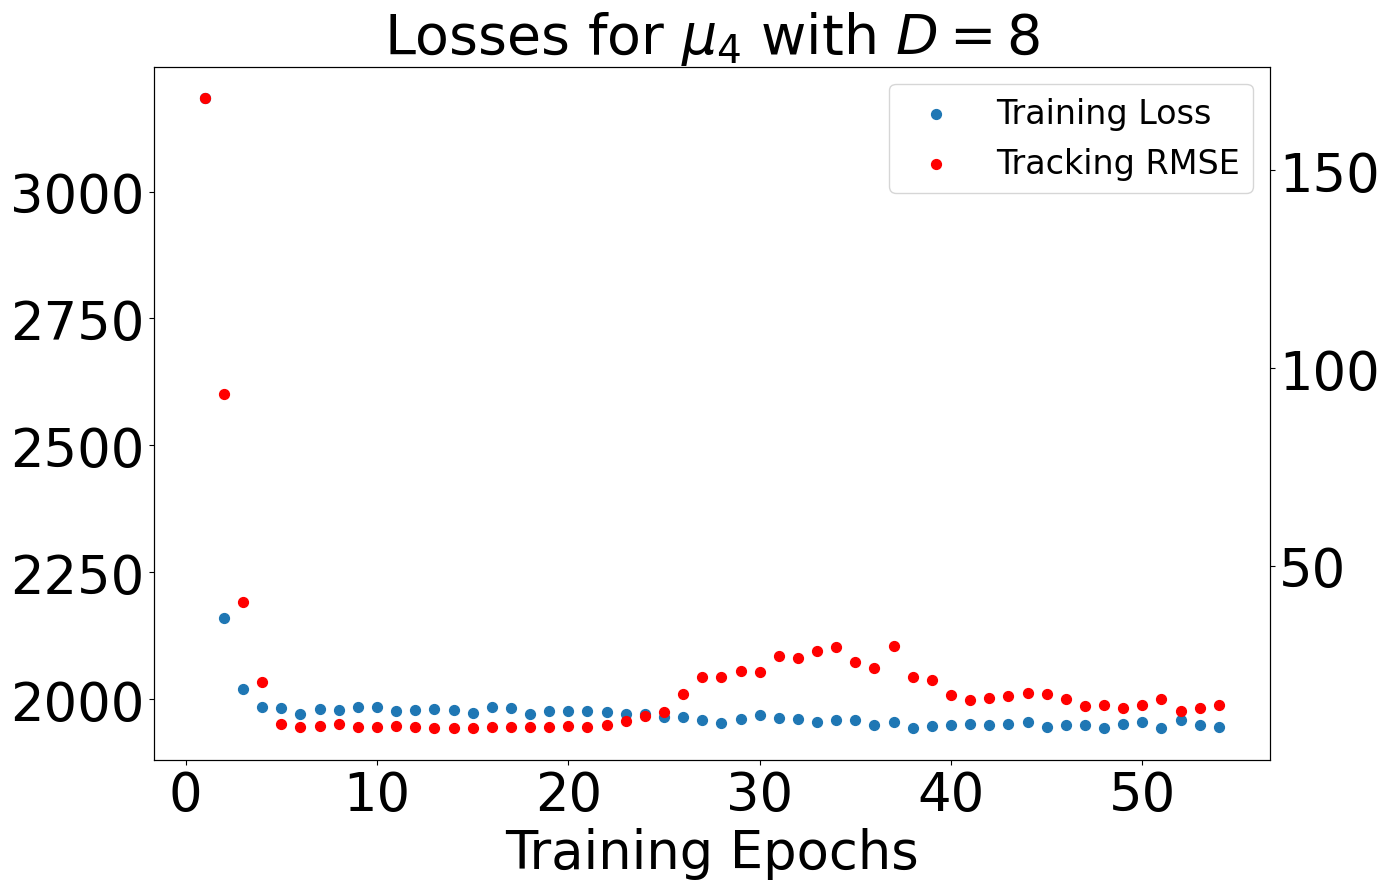

In [14]:
toSave = False
fig, ax = plt.subplots(figsize=(14,9))
max_idx = np.argwhere(common_epochs <=200).flatten()[-1]
sc1 = ax.scatter(common_epochs[:max_idx+1], red_losses[:max_idx+1], s=50, label="Training Loss")
ax2 = ax.twinx()
sc2 = ax2.scatter(common_epochs[:max_idx+1], track_rmses[:max_idx+1], s=50, color="red",label="Tracking RMSE")
ax.set_xlabel("Training Epochs", fontsize=38)
ax.set_title(r"Losses for $\mu_{4}$ with $D=8$", fontsize=40)
ax.tick_params(axis="both",labelsize=38)
ax2.tick_params(axis="both",labelsize=38)
plt.tight_layout()
handles = [sc1, sc2]
labels = [h.get_label() for h in handles]
# Add a single legend on ax1
ax.legend(handles, labels, fontsize=24)
if toSave:
    plt.savefig((root_dir + f"DiffusionModelPresentationImages/TSPM_Markovian/8DDimsNS/TSPM_MLP_PM_ST_{config.feat_thresh:.3f}FTh_fBiPot_{config.ndims}DDimsNS_LossesTrack_{config.loss_factor}LFac").replace(".","")+".png",  bbox_inches='tight')
plt.show()
plt.close()

(2, 100, 257, 8)


/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_1703/372419931.py:17: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_1703/372419931.py:18: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


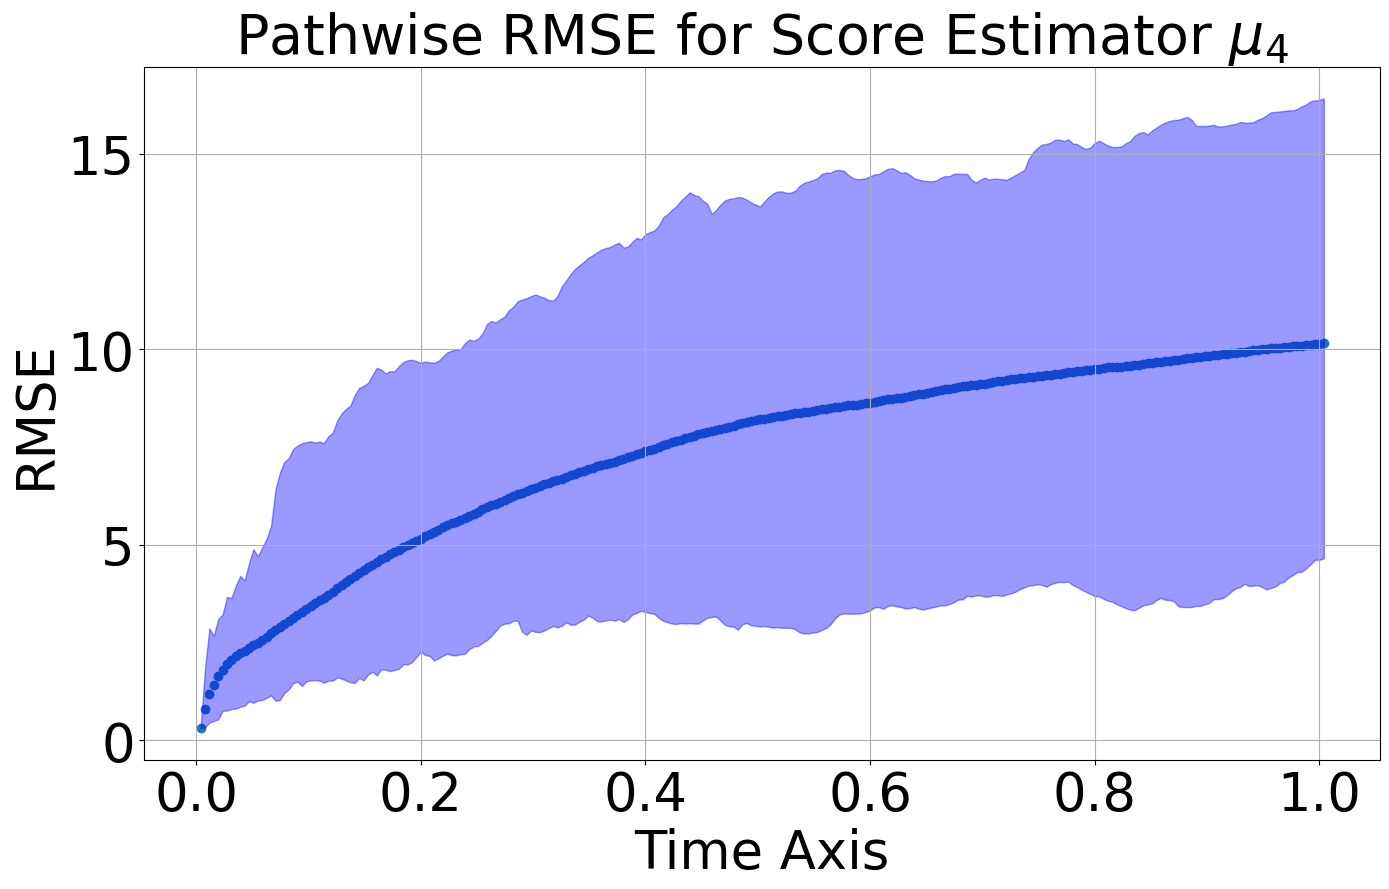

Final time cumulative MSE local-time error 10.146498902229649 with final IQR (4.648291247485569, 16.41078161405619) at Nepoch 5

(2, 100, 257, 8)


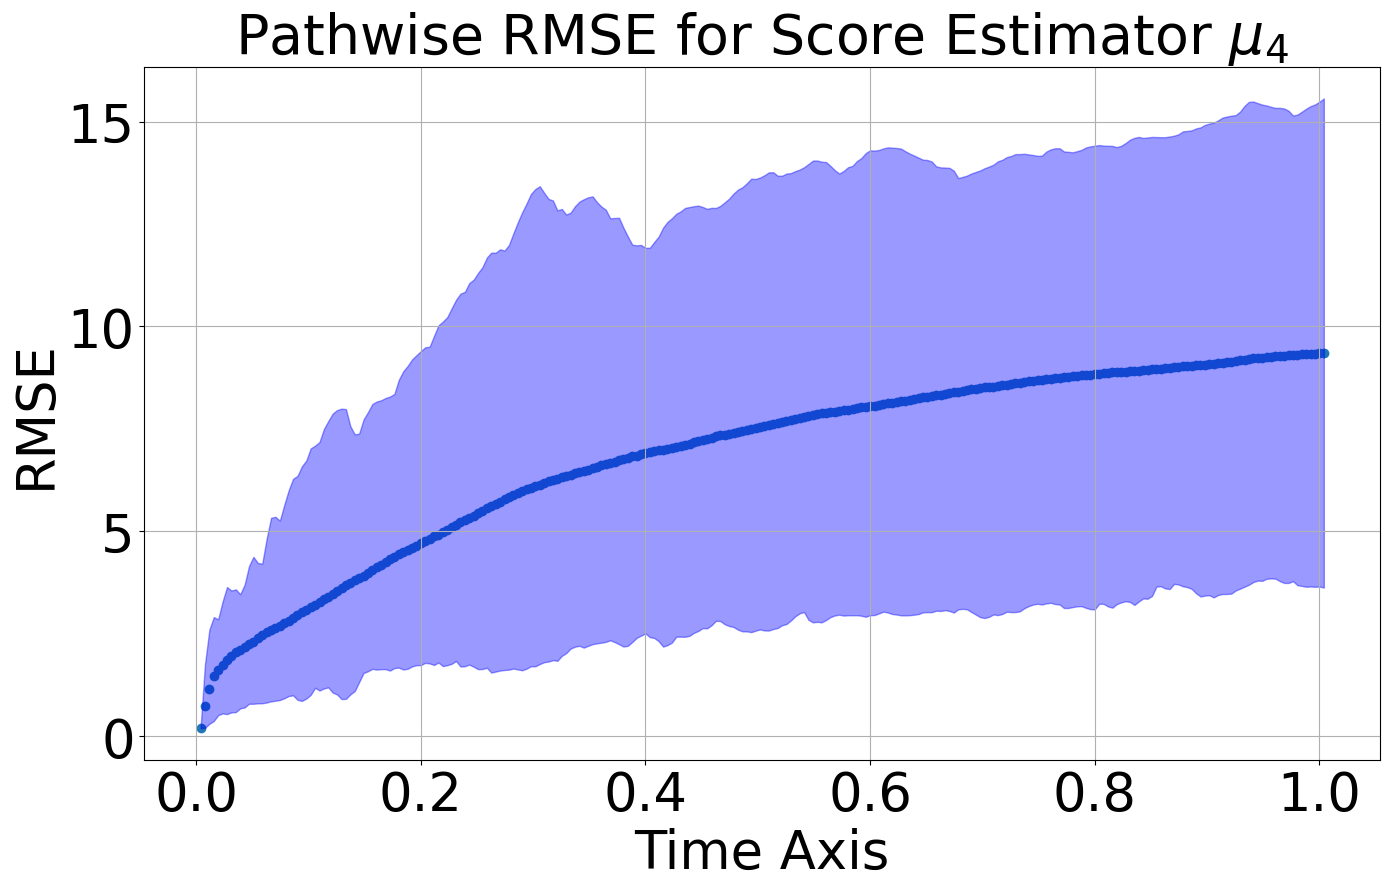

Final time cumulative MSE local-time error 9.351815971064452 with final IQR (3.625331927708578, 15.563520872908637) at Nepoch 6

(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)


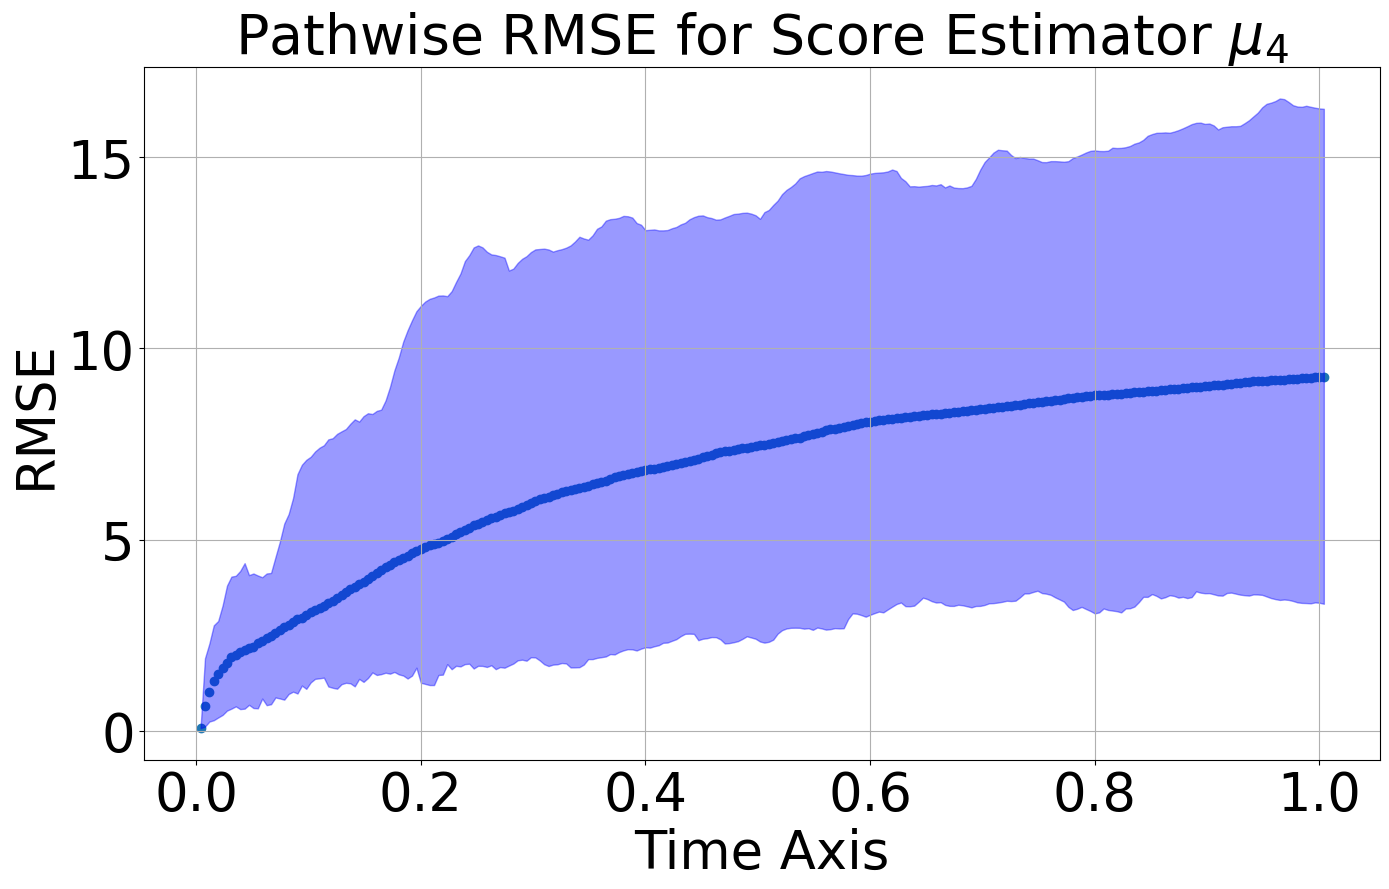

Final time cumulative MSE local-time error 9.251316676909498 with final IQR (3.3214783361376266, 16.263980604843187) at Nepoch 9

(2, 100, 257, 8)


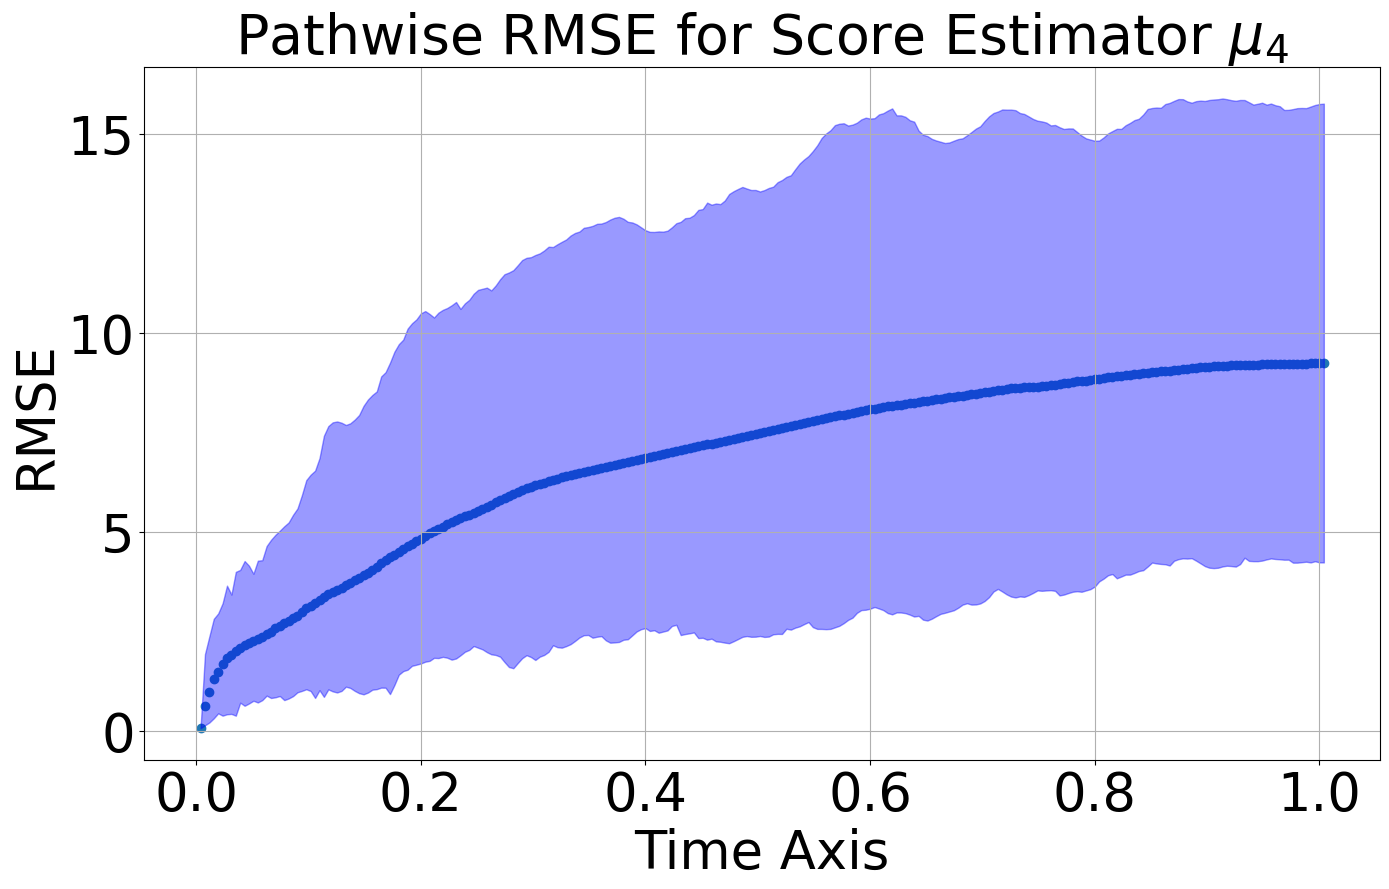

Final time cumulative MSE local-time error 9.239512833015695 with final IQR (4.231419987592881, 15.755004865336085) at Nepoch 10

(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)


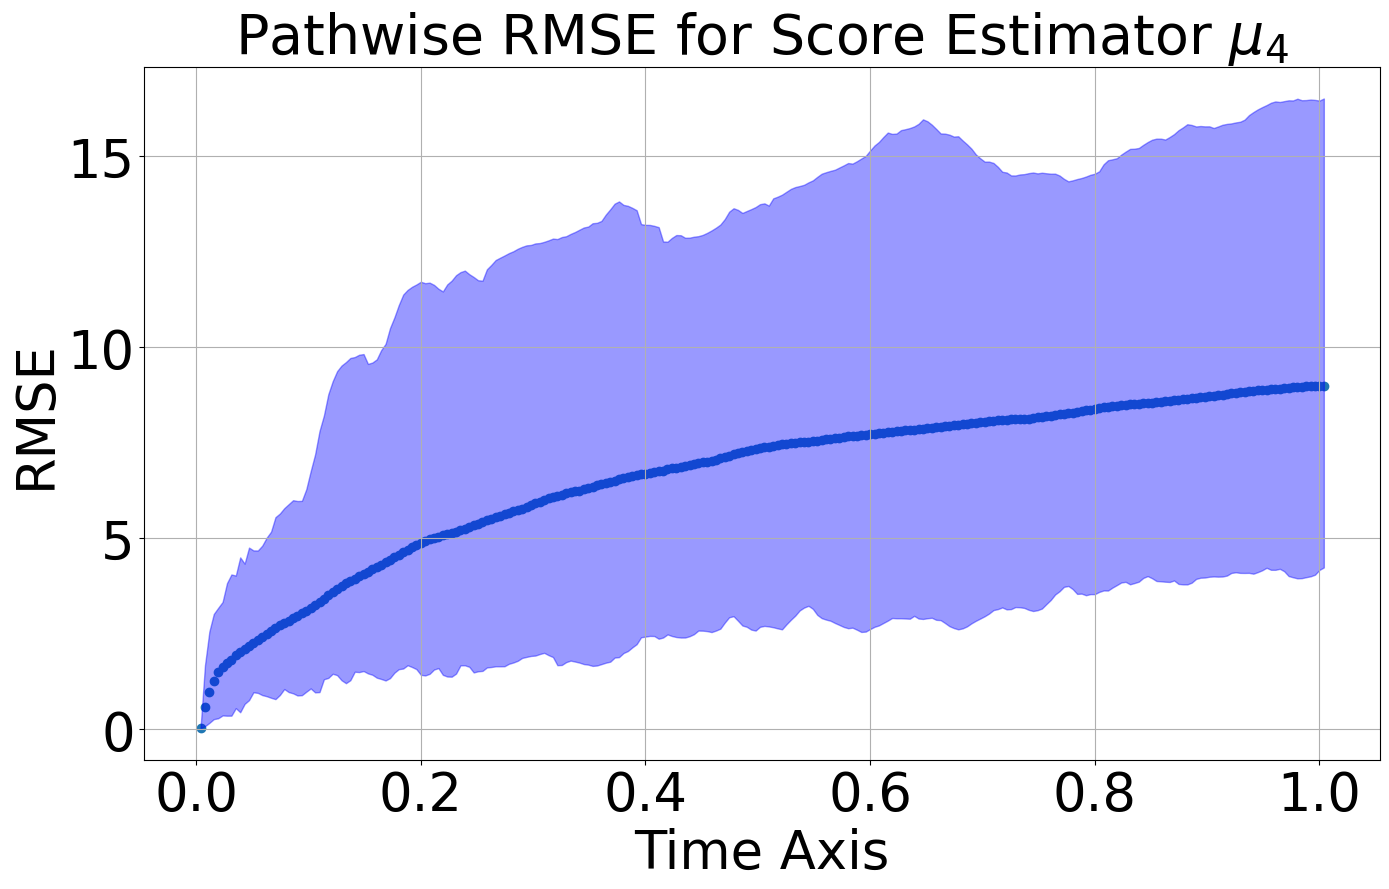

Final time cumulative MSE local-time error 8.987662005252766 with final IQR (4.230373322528929, 16.50995172761464) at Nepoch 13

(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)
(2, 100, 257, 8)


In [15]:
curr_rmse = np.inf
toSave = False
for f_idx in range(len(common_epochs)):
    Nepoch = common_epochs[f_idx]
    ff_idx = np.argwhere(Nepoch == np.array(epochs_iter))[0,0]
    true = drift_true_files[ff_idx]
    local = drift_local_files[ff_idx]
    try:
        if Nepoch < 5: raise FileNotFoundError
        num_diff_times = 1
        all_true_states = np.load(true)
        all_local_states= np.load(local)
        print(all_local_states.shape)
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)<
        if total_local_errors[-1] < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Score Estimator $\mu_4$",fontsize=40)
            ax.set_ylabel("RMSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/TSPM_Markovian/8DDimsNS/TSPM_MLP_PM_ST_{config.feat_thresh:.3f}FTh_fBiPot_{config.ndims}DDimsNS_DriftTrack_{Nepoch}Nep_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with final IQR {(total_local_errors_minq[-1], total_local_errors_maxq[-1])} at Nepoch {Nepoch}\n")
    except FileNotFoundError as e:
        continue

In [16]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.resource_logging_path, inclusive=True)
data

{'progress_name': 'epoch',
 'span_units': 56.0,
 'wall_clock_h_total': 17.939895091454186,
 'wall_clock_per_unit_h': 0.32035526949025334,
 'cpu_avg_pct': 5.092764378478664,
 'cpu_peak_pct': 5.7,
 'ram_avg_gib': 19.97463617068646,
 'ram_peak_gib': 20.094788,
 'gpu_util_avg_pct': 0.0,
 'gpu_util_peak_pct': 0.0,
 'gpu_mem_avg_gib': 0.466624,
 'gpu_mem_peak_gib': 0.466624}

In [17]:
24.019614780590+2.427880978

26.44749575859